- This project focuses on analysing the impact of remote work on the mental health state of employees with different job role and  working in different industries across different region . Throught the project we uncover the relation of various features with the work location 

First EDA then hypo


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

## Importing the Data 

The Dataframe: Impact of remote work on mental health has the following columns : 

* Employee_ID : Employee ID of the people involved in the survey 
* Age: Age of the Employees 
* Gender: Gender of the employees , categorical column 
* Job Role: Its a categorical column , has seven categories 
* Industry : categorical column , it has seven categories 
* Years of Experience: Work Experience of the employees 
* Work Location: categorical column , it has three categories 
* Hours Worked Per Week : Hours spend by employees working 
* Number of Virtual Meetings 
* Work Life Balance Rating: Rating is given out of five 
* Stress Level: Rating is given out of five 
* Mental Health Condition: Cateforical Value having four categories 
* Access to Mental Health Resources: Categorical value 
* Productivity Change: Categorical Value 
* Social Isolation Rating: Rating out five 
* Satisfaction with Remote Work:Categorical values 
* Company Support for Remote Work: Categorical value , having 5 categories 
* Physical Activity: Categorical values 
* Sleep Quality: Categorical values, 3 values  
* Region: Categorical values , having 6 categories 


In [3]:
df= pd.read_csv(r"C:\Users\Admin\Downloads\mental health py2\Impact_of_Remote_Work_on_Mental_Health.csv")
print(df.shape)
print(40*'-')
print(df.columns)

(5000, 20)
----------------------------------------
Index(['Employee_ID', 'Age', 'Gender', 'Job_Role', 'Industry',
       'Years_of_Experience', 'Work_Location', 'Hours_Worked_Per_Week',
       'Number_of_Virtual_Meetings', 'Work_Life_Balance_Rating',
       'Stress_Level', 'Mental_Health_Condition',
       'Access_to_Mental_Health_Resources', 'Productivity_Change',
       'Social_Isolation_Rating', 'Satisfaction_with_Remote_Work',
       'Company_Support_for_Remote_Work', 'Physical_Activity', 'Sleep_Quality',
       'Region'],
      dtype='object')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition            5000 non-null   object
 12  Access

In [5]:
df.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,None,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,None,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,None,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


#### DATA EXPLORATION 


In [5]:
df.nunique()

Employee_ID                          5000
Age                                    39
Gender                                  4
Job_Role                                7
Industry                                7
Years_of_Experience                    35
Work_Location                           3
Hours_Worked_Per_Week                  41
Number_of_Virtual_Meetings             16
Work_Life_Balance_Rating                5
Stress_Level                            3
Mental_Health_Condition                 4
Access_to_Mental_Health_Resources       2
Productivity_Change                     3
Social_Isolation_Rating                 5
Satisfaction_with_Remote_Work           3
Company_Support_for_Remote_Work         5
Physical_Activity                       3
Sleep_Quality                           3
Region                                  6
dtype: int64

In [4]:

df['Gender'] = df['Gender'].apply(lambda x: 'Other' if x in ['Non-binary', 'Prefer not to say'] else x)

In [5]:
numerical_columns = df.select_dtypes(include='int64').columns
skewness = df[numerical_columns].skew()
print(skewness)

Age                               -0.020576
Years_of_Experience                0.007749
Hours_Worked_Per_Week              0.032316
Number_of_Virtual_Meetings        -0.015123
Work_Life_Balance_Rating           0.008304
Social_Isolation_Rating            0.010613
Company_Support_for_Remote_Work   -0.005113
dtype: float64


In [6]:
df.describe()

,Age,Years_of_Experience,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Social_Isolation_Rating,Company_Support_for_Remote_Work
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,40.995000,17.810200,39.614600,7.559000,2.984200,2.993800,3.007800
std,11.296021,10.020412,11.860194,4.636121,1.410513,1.394615,1.399046
min,22.000000,1.000000,20.000000,0.000000,1.000000,1.000000,1.000000
25%,31.000000,9.000000,29.000000,4.000000,2.000000,2.000000,2.000000
50%,41.000000,18.000000,40.000000,8.000000,3.000000,3.000000,3.000000
75%,51.000000,26.000000,50.000000,12.000000,4.000000,4.000000,4.000000
max,60.000000,35.000000,60.000000,15.000000,5.000000,5.000000,5.000000


In [7]:
df.describe(include = ['O'])

,Employee_ID,Gender,Job_Role,Industry,Work_Location,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Satisfaction_with_Remote_Work,Physical_Activity,Sleep_Quality,Region
count,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000
unique,5000,3,7,7,3,3,4,2,3,3,3,3,6
top,EMP0001,Other,Project Manager,Finance,Remote,High,Burnout,No,Decrease,Unsatisfied,Weekly,Good,Oceania
freq,1,2456,738,747,1714,1686,1280,2553,1737,1677,1755,1687,867


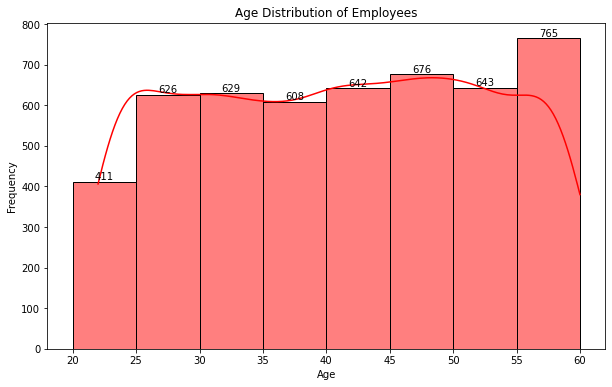

In [8]:
plt.figure(figsize=(10, 6))
custom_bins = [20,25,30,35,40,45,50,55,60]
ax = sns.histplot(df['Age'], bins= custom_bins, kde=True, color='red')
ax.bar_label(ax.containers[0])
plt.title('Age Distribution of Employees')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


The distribution is approximately normal, with a peak around the age of 45-50. This indicates that a significant portion of the employees fall within this age range.
The distribution is slightly right-skewed, meaning there is a longer tail on the right side. This suggests that there are some older employees in the survey  , the highest frequency of the employee is in the range of 55-60 and the lowest frequency is in the range 20-25. 

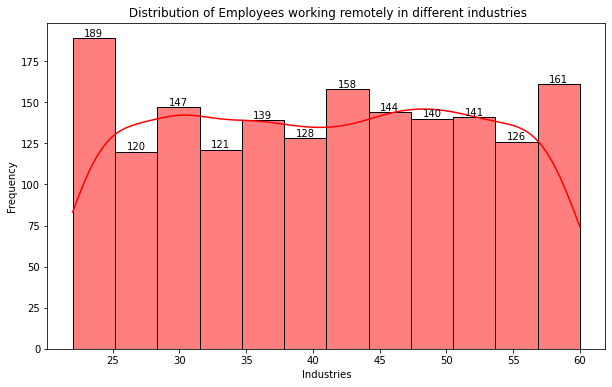

In [8]:
temp_df = df[df['Work_Location']=='Remote' ]
plt.figure(figsize=(10, 6))

ax = sns.histplot(temp_df['Age'], kde=True, color='red')
ax.bar_label(ax.containers[0])
plt.title(' Distribution of Employees working remotely in different industries')
plt.xlabel('Industries')
plt.ylabel('Frequency')
plt.show()

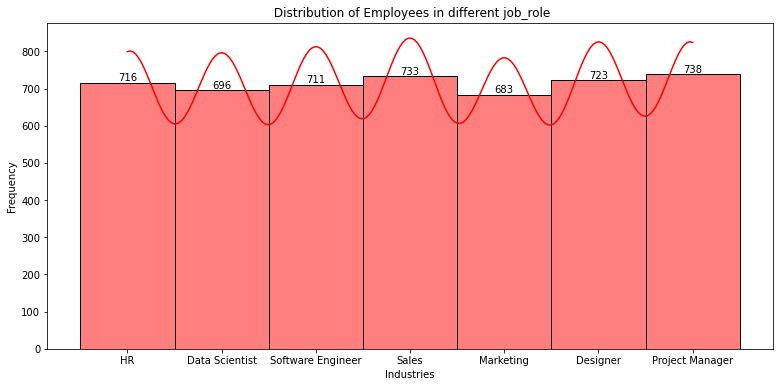

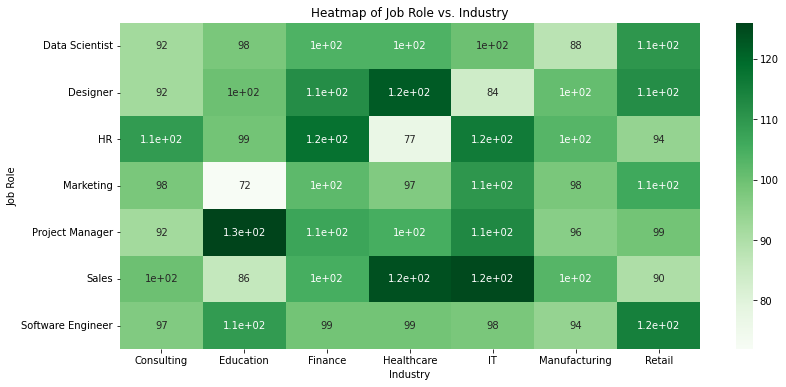

In [10]:
plt.figure(figsize=(13, 6))
custom_bins = [20,25,30,35,40,45,50,55,60]
ax = sns.histplot(df['Job_Role'], bins= custom_bins, kde=True, color='red')
ax.bar_label(ax.containers[0])
plt.title(' Distribution of Employees in different job_role')
plt.xlabel('Industries')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(13, 6))
pivot_table = df.pivot_table(index=df['Job_Role'], columns=df['Industry'], aggfunc='size')

# Create the heatmap
sns.heatmap(pivot_table, annot=True, cmap='Greens')

plt.title('Heatmap of Job Role vs. Industry')
plt.xlabel('Industry')
plt.ylabel('Job Role')
plt.show()

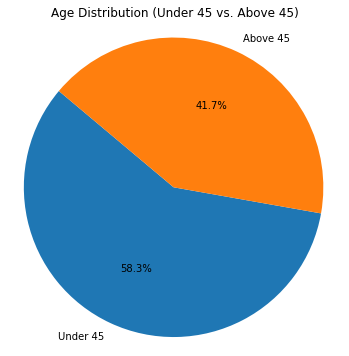

In [11]:
# Calculate counts for under 45 and above 45
under_45 = df[df['Age'] < 45].shape[0]
above_45 = df[df['Age'] >= 45].shape[0]

# Calculate percentages
total = df.shape[0]
percent_under_45 = (under_45 / total) * 100
percent_above_45 = (above_45 / total) * 100

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie([percent_under_45, percent_above_45], labels=['Under 45', 'Above 45'], autopct='%1.1f%%', startangle=140)
plt.title('Age Distribution (Under 45 vs. Above 45)')
plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart

plt.show()

In [13]:
temp_df['Satisfaction_with_Remote_Work'].value_counts()

Neutral        603
Unsatisfied    592
Satisfied      519
Name: Satisfaction_with_Remote_Work, dtype: int64

In [14]:
ax1 = temp_df.groupby(['Job_Role','Satisfaction_with_Remote_Work'])['Employee_ID'].count()
ax1


Job_Role           Satisfaction_with_Remote_Work
Data Scientist     Neutral                           86
                   Satisfied                         80
                   Unsatisfied                       88
Designer           Neutral                           84
                   Satisfied                         69
                   Unsatisfied                       90
HR                 Neutral                           87
                   Satisfied                         71
                   Unsatisfied                       97
Marketing          Neutral                           80
                   Satisfied                         64
                   Unsatisfied                       84
Project Manager    Neutral                          101
                   Satisfied                         68
                   Unsatisfied                       73
Sales              Neutral                           87
                   Satisfied                         76

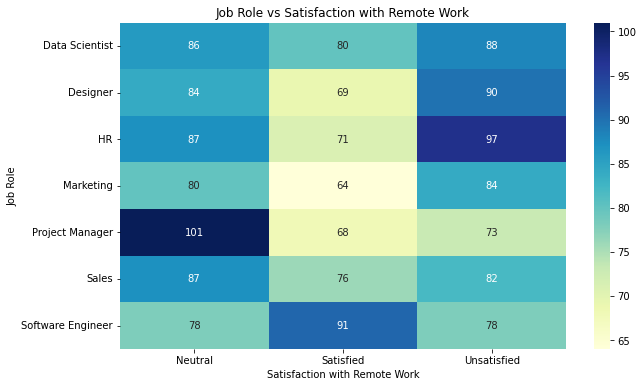

In [15]:
ax1_unstacked = ax1.unstack(level='Satisfaction_with_Remote_Work')

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(ax1_unstacked, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Job Role vs Satisfaction with Remote Work')
plt.ylabel('Job Role')
plt.xlabel('Satisfaction with Remote Work')
plt.show()

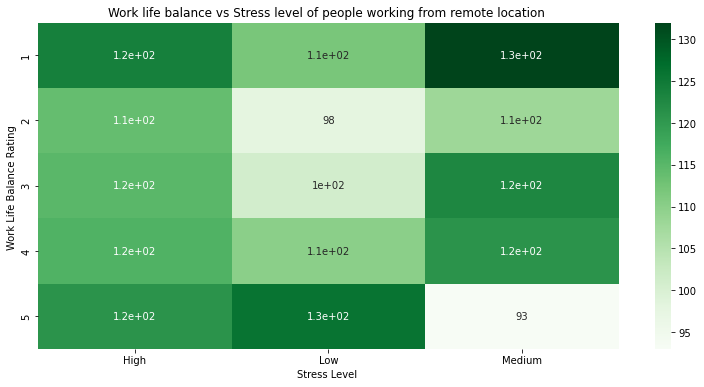

In [16]:
plt.figure(figsize=(13, 6))
pivot_table = temp_df.pivot_table(index=temp_df['Work_Life_Balance_Rating'], columns=temp_df['Stress_Level'], aggfunc='size')

# Create the heatmap
sns.heatmap(pivot_table, annot=True, cmap='Greens')

plt.title('Work life balance vs Stress level of people working from remote location ')
plt.xlabel('Stress Level ')
plt.ylabel('Work Life Balance Rating ')
plt.show()

In [17]:
temp_df.groupby(['Stress_Level','Mental_Health_Condition'])['Employee_ID'].count()

Stress_Level  Mental_Health_Condition
High          Anxiety                    156
              Burnout                    152
              Depression                 137
              None                       145
Low           Anxiety                    148
              Burnout                    135
              Depression                 144
              None                       120
Medium        Anxiety                    139
              Burnout                    151
              Depression                 132
              None                       155
Name: Employee_ID, dtype: int64

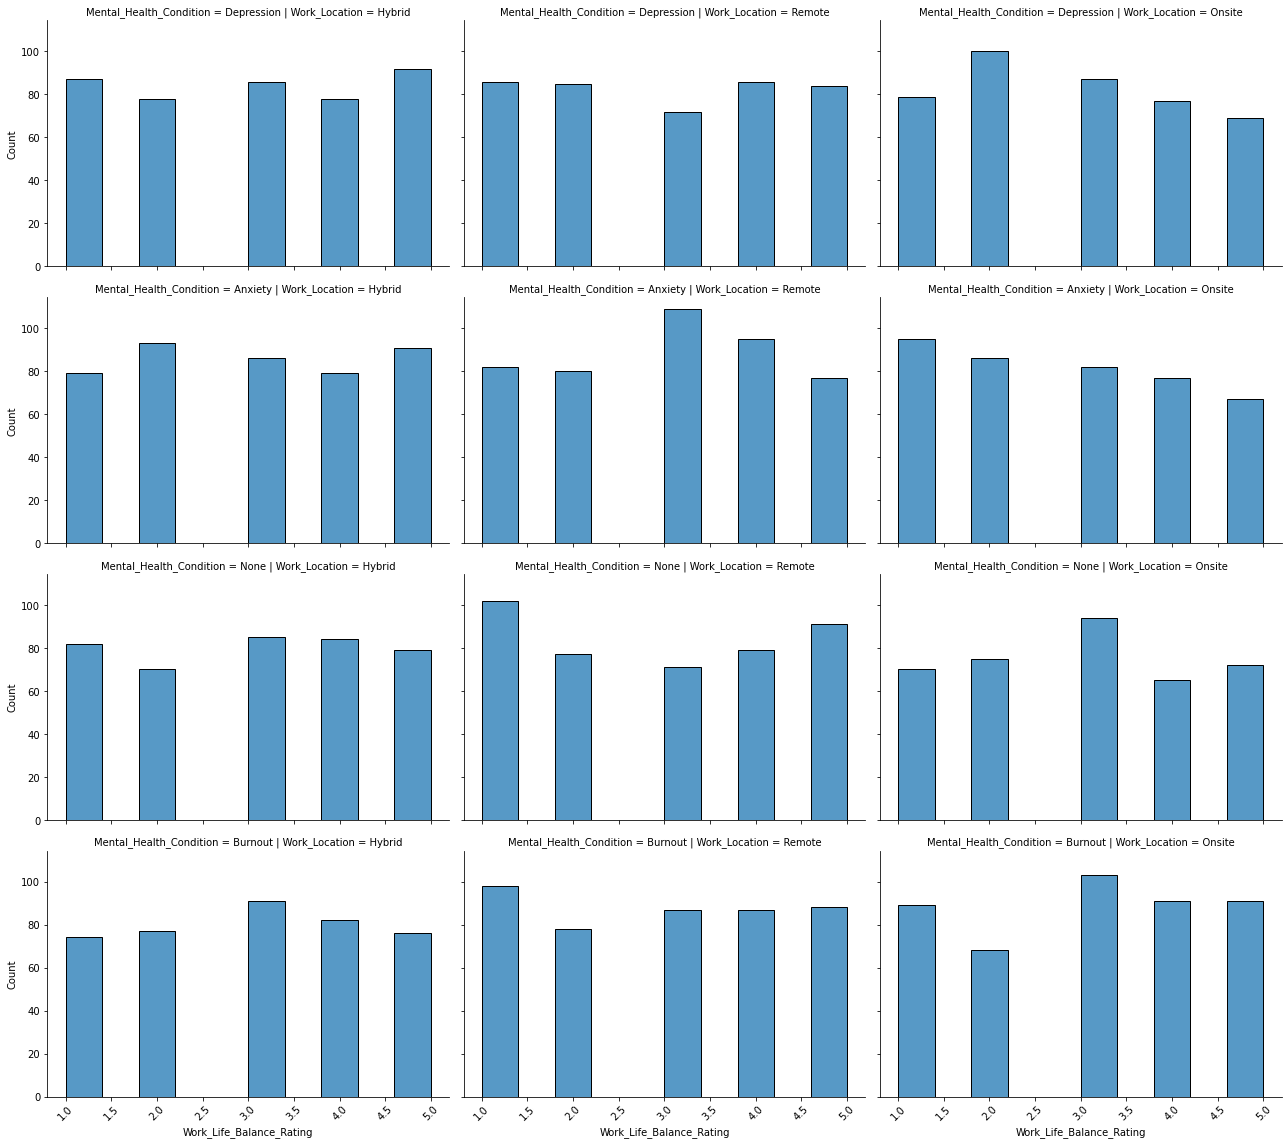

In [18]:
g = sns.FacetGrid(df, col="Work_Location", row="Mental_Health_Condition", height =4 , aspect=1.5)
g.map(sns.histplot, "Work_Life_Balance_Rating")

for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

plt.tight_layout()
plt.show()


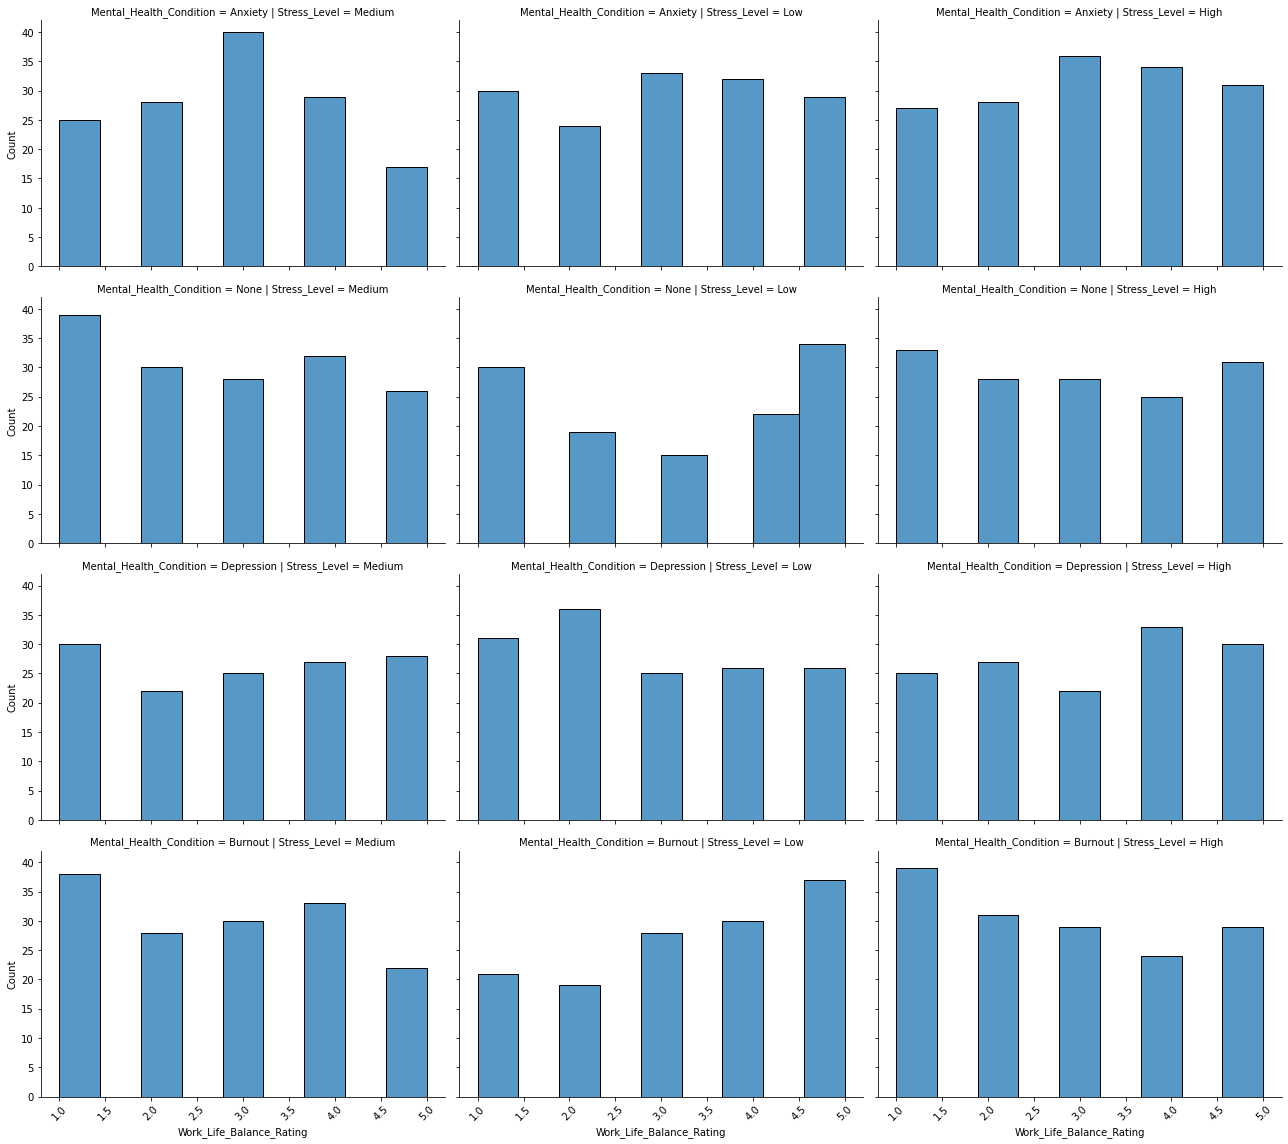

In [19]:

g = sns.FacetGrid(temp_df, col="Stress_Level", row="Mental_Health_Condition", height =4 , aspect=1.5)
g.map(sns.histplot, "Work_Life_Balance_Rating")

for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

plt.tight_layout()
plt.show()

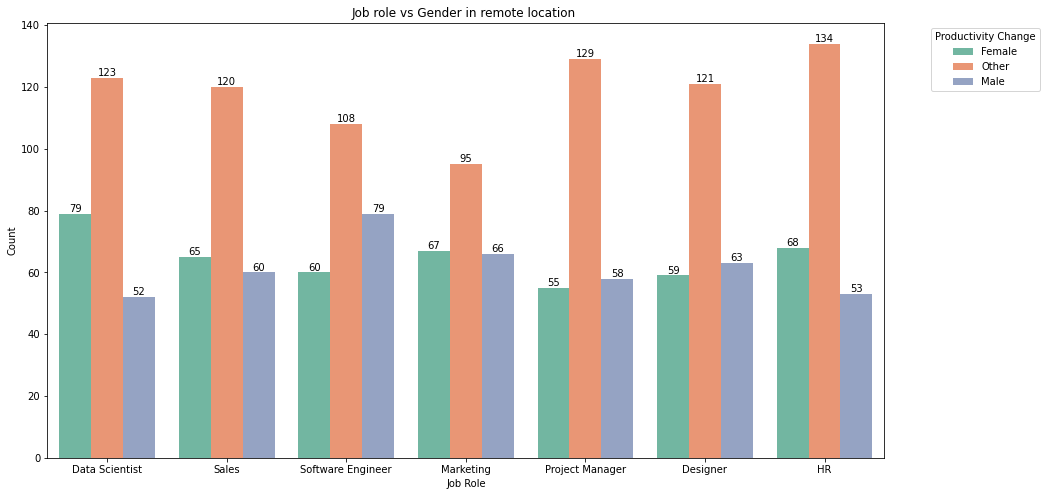

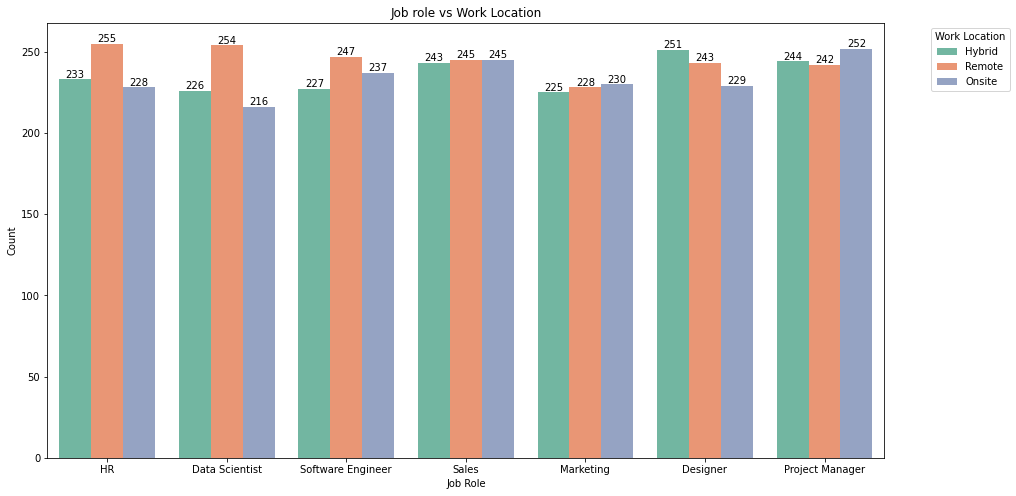

In [20]:
plt.figure(figsize=(15, 8))
ax = sns.countplot(data=temp_df, x='Job_Role', hue='Gender', palette='Set2')
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.title('Job role vs Gender in remote location ')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.legend(title='Productivity Change', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

plt.figure(figsize=(15, 8))
ax = sns.countplot(data=df, x='Job_Role', hue='Work_Location', palette='Set2')
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.title('Job role vs Work Location')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.legend(title='Work Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [21]:
df.groupby('Work_Location')['Work_Life_Balance_Rating'].mean()

Work_Location
Hybrid    3.022438
Onsite    2.946854
Remote    2.983081
Name: Work_Life_Balance_Rating, dtype: float64

In [22]:
df.groupby(['Work_Life_Balance_Rating','Work_Location'])['Satisfaction_with_Remote_Work'].count()

Work_Life_Balance_Rating  Work_Location
1                         Hybrid           322
                          Onsite           333
                          Remote           368
2                         Hybrid           318
                          Onsite           329
                          Remote           320
3                         Hybrid           348
                          Onsite           366
                          Remote           339
4                         Hybrid           323
                          Onsite           310
                          Remote           347
5                         Hybrid           338
                          Onsite           299
                          Remote           340
Name: Satisfaction_with_Remote_Work, dtype: int64

In [23]:
x=df['Work_Location'] = df['Work_Location'].replace({0: 'Hybrid', 2: 'Remote', 1: 'Onsite'})



In [24]:
df.groupby(['Job_Role','Work_Life_Balance_Rating'])['Work_Life_Balance_Rating'].count()

Job_Role           Work_Life_Balance_Rating
Data Scientist     1                           148
                   2                           118
                   3                           156
                   4                           129
                   5                           145
Designer           1                           142
                   2                           145
                   3                           167
                   4                           133
                   5                           136
HR                 1                           160
                   2                           135
                   3                           142
                   4                           153
                   5                           126
Marketing          1                           142
                   2                           137
                   3                           148
                   4                  

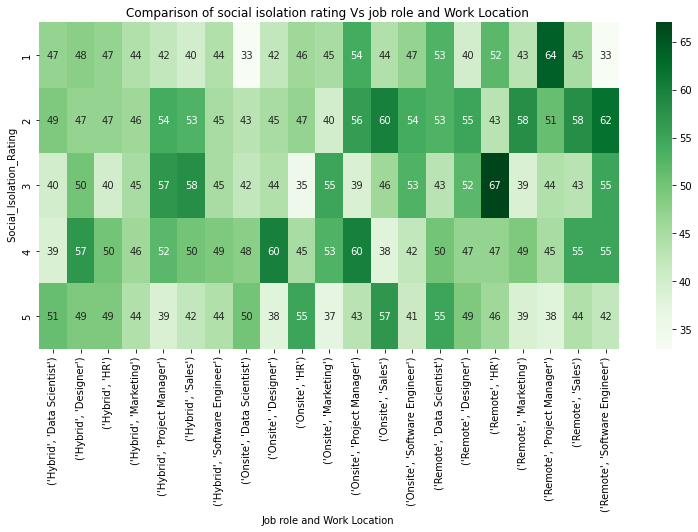

In [25]:
plt.figure(figsize=(13, 6))
pivot_table =df.pivot_table(index=df['Social_Isolation_Rating'],columns=pd.MultiIndex.from_arrays([df['Work_Location'], df['Job_Role']]), aggfunc='size')

# Create the heatmap
sns.heatmap(pivot_table, annot=True, cmap='Greens')

plt.title('Comparison of social isolation rating Vs job role and Work Location ')
plt.xlabel('Job role and Work Location ')
plt.ylabel(' Social_Isolation_Rating')
plt.show()

In [37]:
temp_df.groupby(['Sleep_Quality','Physical_Activity'])['Age'].mean()

Sleep_Quality  Physical_Activity
Average        Daily                41.019231
               None                 41.296512
               Weekly               40.618812
Good           Daily                40.891089
               None                 40.467033
               Weekly               39.472527
Poor           Daily                41.857955
               None                 40.370370
               Weekly               41.626866
Name: Age, dtype: float64

In [27]:
temp_df.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
6,EMP0007,31,Other,Sales,IT,24,Remote,51,7,3,Low,Anxiety,Yes,Decrease,5,Neutral,3,Daily,Poor,Asia
10,EMP0011,33,Other,Software Engineer,Finance,17,Remote,48,3,3,High,None,Yes,Decrease,4,Satisfied,2,Weekly,Average,Oceania
12,EMP0013,40,Female,Marketing,Consulting,1,Remote,21,7,2,High,Depression,Yes,Decrease,2,Neutral,1,Weekly,Good,Europe
14,EMP0015,36,Other,Project Manager,Retail,23,Remote,59,11,3,High,Anxiety,Yes,Decrease,5,Neutral,3,Weekly,Average,Oceania
